<a href="https://colab.research.google.com/github/hinddiira/Breast-Cancer-Detection/blob/main/Breast_cancer__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name     : H.Inddiira          
Roll no  : 229X1A3266                                                            
College  : G Pulla reddy engineering college                                                                                                                                            
Project  : Breast cancer detection                                                                                                                               
email    : 229x1a3266@gprec.ac.in

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import ipywidgets as widgets
from IPython.display import display


Load the dataset

In [ ]:
# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Data sample:")
print(X.head())

print("\nLabels (0 = benign, 1 = malignant):")
print(y.value_counts())

Data sample:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \

Split the data

In [ ]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data prepared and scaled!")


Data prepared and scaled!


Define the model

In [ ]:
# Build the neural network
model = Sequential([
    Dense(30, activation='relu', input_shape=(30,)),
    Dropout(0.3),
    Dense(15, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

Set up callbacks (early stopping & learning rate adjustment)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

print("Callbacks configured.")


Callbacks configured.


Train the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule]
)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4877 - loss: 0.7609 - val_accuracy: 0.8022 - val_loss: 0.5237 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.5305 - val_accuracy: 0.9451 - val_loss: 0.3885 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9014 - loss: 0.3931 - val_accuracy: 0.9780 - val_loss: 0.2960 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8993 - loss: 0.3309 - val_accuracy: 0.9670 - val_loss: 0.2355 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9406 - loss: 0.2700 - val_accuracy: 0.9670 - val_loss: 0.1900 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9604 - loss: 0.2129 - val_accuracy: 0.9670 - val_loss: 0.1610 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9753 - loss: 0.1745 - val_ac

Plot training vs. validation loss and accuracy

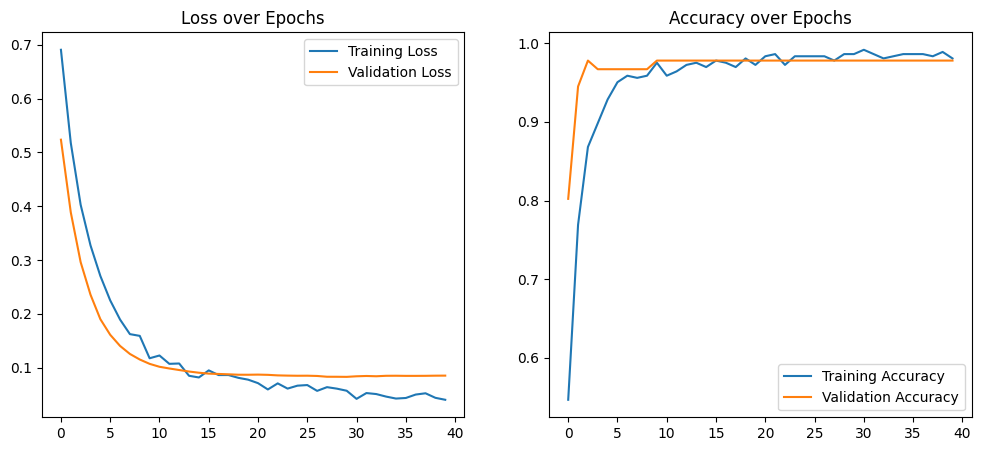

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

Evaluate on test data

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9759 - loss: 0.0793
Test Accuracy: 0.97


 Save and load the model

In [ ]:
model.save('breast_cancer_detection_model.h5')
print("Model saved successfully!")
model = load_model('breast_cancer_detection_model.h5')
print("Model loaded successfully!")

Model saved successfully!
Model loaded successfully!


Define prediction function

In [ ]:
def predict_cancer(input_data):
    # Convert to numpy array and reshape for the model (1 sample, 30 features)
    input_data = np.array(input_data).reshape(1, -1)

    # Apply the same scaling used during training
    input_data = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data)[0][0]

    # Interpret the result
    result = "Malignant (Cancerous)" if prediction > 0.5 else "Benign (Not Cancerous)"
    print(f"Prediction: {result} (Confidence: {prediction:.2f})")


In [ ]:
# Example patient data (30 features)
sample_data = [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
               1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
               25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
predict_cancer(sample_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: Benign (Not Cancerous) (Confidence: 0.00)


Test with sample patient data

In [ ]:
# Create input fields for all 30 features
input_fields = [widgets.FloatText(description=f'Feature {i+1}') for i in range(30)]

# Submit button
predict_button = widgets.Button(description="Predict Cancer")

# Display inputs and button
for field in input_fields:
    display(field)
display(predict_button)

# Define what happens when you click the button
def on_predict_click(b):
    user_input = [field.value for field in input_fields]
    predict_cancer(user_input)

predict_button.on_click(on_predict_click)

FloatText(value=0.0, description='Feature 1')

FloatText(value=0.0, description='Feature 2')

FloatText(value=0.0, description='Feature 3')

FloatText(value=0.0, description='Feature 4')

FloatText(value=0.0, description='Feature 5')

FloatText(value=0.0, description='Feature 6')

FloatText(value=0.0, description='Feature 7')

FloatText(value=0.0, description='Feature 8')

FloatText(value=0.0, description='Feature 9')

FloatText(value=0.0, description='Feature 10')

FloatText(value=0.0, description='Feature 11')

FloatText(value=0.0, description='Feature 12')

FloatText(value=0.0, description='Feature 13')

FloatText(value=0.0, description='Feature 14')

FloatText(value=0.0, description='Feature 15')

FloatText(value=0.0, description='Feature 16')

FloatText(value=0.0, description='Feature 17')

FloatText(value=0.0, description='Feature 18')

FloatText(value=0.0, description='Feature 19')

FloatText(value=0.0, description='Feature 20')

FloatText(value=0.0, description='Feature 21')

FloatText(value=0.0, description='Feature 22')

FloatText(value=0.0, description='Feature 23')

FloatText(value=0.0, description='Feature 24')

FloatText(value=0.0, description='Feature 25')

FloatText(value=0.0, description='Feature 26')

FloatText(value=0.0, description='Feature 27')

FloatText(value=0.0, description='Feature 28')

FloatText(value=0.0, description='Feature 29')

FloatText(value=0.0, description='Feature 30')

Button(description='Predict Cancer', style=ButtonStyle())

In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file (like sample_patient_data.csv)
uploaded = files.upload()

# Read the uploaded file into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"\nUploaded file: {filename}")
    print(df.head())

    # Check if the file has the correct number of features (30)
    if df.shape[1] != 30:
        print(f"Warning: Expected 30 features, but got {df.shape[1]}. Please check your file.")


Saving sample_patient_data.csv to sample_patient_data (7).csv

Uploaded file: sample_patient_data (7).csv
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    37.454012     95.071431       73.199394  59.865848        15.601864   
1    60.754485     17.052412        6.505159  94.888554        96.563203   
2    38.867729     27.134903       82.873751  35.675333        28.093451   
3    11.959425     71.324479       76.078505  56.127720        77.096718   
4    80.744016     89.609130       31.800347  11.005192        22.793516   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         15.599452        5.808361            86.617615      60.111501   
1         80.839735       30.461377             9.767211      68.423303   
2         54.269608       14.092422            80.219698       7.455064   
3         49.379560       52.273283            42.754102       2.541913   
4         42.710779       81.801477            86.073058      

In [ ]:
import numpy as np

# Function to predict cancer for batch data
def batch_predict(df):
    # Ensure the input data has 30 features
    if df.shape[1] != 30:
        print(f"Error: Expected 30 features, but got {df.shape[1]}. Please check your file.")
        return

    # Scale the data using the same scaler used during training
    scaled_data = scaler.transform(df)

    # Make predictions
    predictions = model.predict(scaled_data).flatten()

    # Convert probabilities to labels
    df['Prediction'] = ["Malignant" if pred > 0.5 else "Benign" for pred in predictions]
    df['Confidence'] = predictions

    print("\nBatch Predictions:")
    print(df[['Prediction', 'Confidence']])

    return df

# Run batch predictions
predicted_df = batch_predict(df)

# Save predictions to CSV
predicted_df.to_csv('predictions_output.csv', index=False)
print("Predictions saved to predictions_output.csv")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Batch Predictions:
   Prediction  Confidence
0   Malignant         1.0
1   Malignant         1.0
2   Malignant         1.0
3      Benign         0.0
4   Malignant         1.0
5   Malignant         1.0
6   Malignant         1.0
7   Malignant         1.0
8   Malignant         1.0
9   Malignant         1.0
10  Malignant         1.0
11  Malignant         1.0
12  Malignant         1.0
13  Malignant         1.0
14  Malignant         1.0
15  Malignant         1.0
16  Malignant         1.0
17  Malignant         1.0
18  Malignant         1.0
19  Malignant         1.0
20  Malignant         1.0
21  Malignant         1.0
22  Malignant         1.0
23  Malignant         1.0
24  Malignant         1.0
25  Malignant         1.0
26  Malignant         1.0
27  Malignant         1.0
28  Malignant         1.0
29  Malignant         1.0
30     Benign         0.0
31  Malignant         1.0
32  Malignant         1.0
33  Malignant         1.0
34  Malignant         1.0
35  Ma

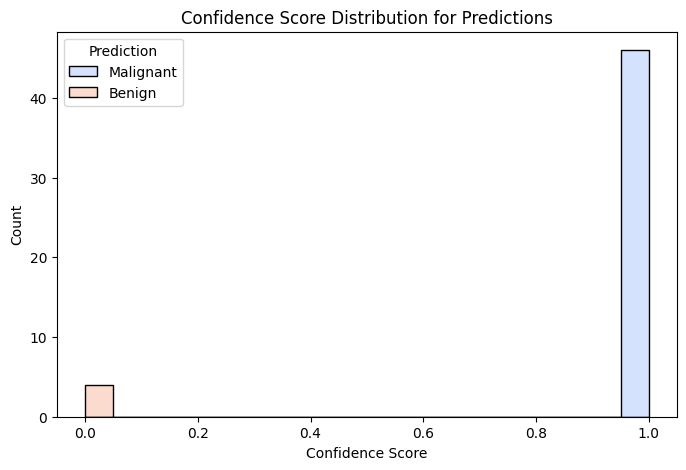

In [ ]:
# Plot the confidence score distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=predicted_df, x='Confidence', hue='Prediction', bins=20, palette='coolwarm', kde=True)
plt.title('Confidence Score Distribution for Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.show()